In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [16]:
df = pd.read_csv(r'C:\Users\KIRAN\Downloads\spam.csv', encoding='latin-1')[['v1', 'v2']]

In [17]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df.columns = ['label', 'text']
df['label'] = df['label'].replace({'ham': 0, 'spam': 1})
print(df.head())

   label                                               text
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


# Feature Engineering

In [21]:
df['text_length'] = df['text'].apply(len)
df['num_words' ] = df['text'].apply(lambda x: len(x.split()))
df['num_digits'] = df['text'].apply(lambda x: sum(c.isdigit() for c in x))

# Defining Target and Features

In [23]:
X = df[['text_length','num_words','num_digits']]
y = df['label']

# Train Test dataset

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Standarization

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Gaussian Navie Bayes Model

In [29]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [30]:
y_pred_gnb = gnb.predict(X_test)

# Evaluation

In [31]:
accuracy_score(y_test, y_pred_gnb)

0.9814593301435407

## confusion matrix

In [35]:
cm = confusion_matrix(y_test, y_pred_gnb)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1438   15]
 [  16  203]]


Text(0.5, 23.52222222222222, 'Predicted')

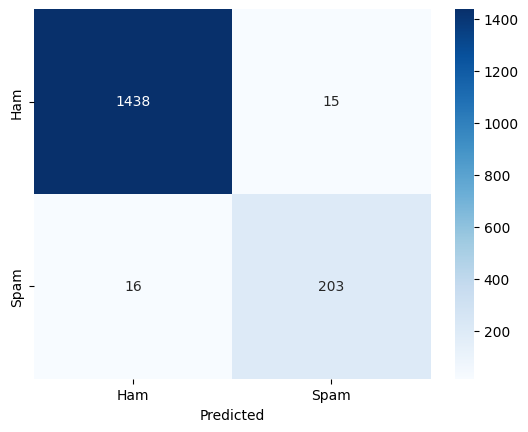

In [33]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')